## Popper Introduction

Let's first create a popper agent class:

In [1]:
from popper import Popper
path = '/dfs/user/kexinh/popper_data_processed'
agent = Popper(llm="claude-3-5-sonnet-20240620")
agent.register_data(data_path=path, loader_type='bio')

The agent requires a LLM model name, so please make sure API key is set in the environment variable or specify here. Here using claude model:

```python
import os
os.setenv('ANTHROPIC_API_KEY', 'YOUR_API_KEY')
```

In the initial instantiation of Popper, we focus on data analysis experiments that are drawn from a massive hypothesis free databases. Here is the hypothesis-free datasets look like: 

In [2]:
for i,j in agent.data_loader.table_dict.items():
    display(j.head(1))

,Description,Tissue,Expression,Gene
0,ENSG00000186092,Adipose - Subcutaneous,0.045396,OR4F5


,DATE ADDED TO CATALOG,PUBMEDID,FIRST AUTHOR,DATE,JOURNAL,LINK,STUDY,DISEASE/TRAIT,INITIAL SAMPLE SIZE,REPLICATION SAMPLE SIZE,...,CONTEXT,INTERGENIC,RISK ALLELE FREQUENCY,P-VALUE,PVALUE_MLOG,P-VALUE (TEXT),OR or BETA,95% CI (TEXT),PLATFORM [SNPS PASSING QC],CNV
0,2018-07-30,27618447,Surendran P,2016-10-01,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/27618447,Trans-ancestry meta-analyses identify rare and...,systolic blood pressure,"up to 165,276 European ancestry individuals, u...","up to 125,713 European ancestry individuals, u...",...,intron_variant,0.0,0.5261,8.000000e-09,8.09691,NaN,0.0196,mmHg decrease,Illumina [242296],N


,gene_id,transcript_id,chr,gene_start,gene_end,strand,transcript_start,transcript_end,tss,transcript_is_canonical,gene_name,percentage_gene_gc_content,gene_type
0,ENSG00000228037,ENST00000424215,1,2581560,2584533,1,2581560,2584533,2581560,1.0,NaN,51.11,lncRNA


,interaction_id,gene_a_id,gene_b_id,experimental_system_type,pubmed_id,organism_id_a,organism_id_b,throughput_type,experimental_score
96170,206363,YCR011C,YCL025C,genetic,PUBMED:16269340,559292,559292,High Throughput,-5.6431


,annotation,Pvalue,Pvalue_Burden,Pvalue_SKAT,BETA_Burden,SE_Burden,gene,pheno_description
0,synonymous,0.72199,0.85198,0.52215,0.00347,0.018598,TSPAN6,Eye problems/disorders; Macular degeneration


,annotation,Pvalue,Pvalue_Burden,Pvalue_SKAT,BETA_Burden,SE_Burden,gene,pheno_description
0,missense_LC,0.85434,0.69637,0.87135,-0.004697,0.012037,TSPAN6,Treatment/medication code; co-dydramol


,annotation,Pvalue,Pvalue_Burden,Pvalue_SKAT,BETA_Burden,SE_Burden,gene,pheno_description
0,pLoF,0.59145,0.96398,0.42053,-0.000538,0.011913,DPM1,Mean L1 in fornix on FA skeleton


,interaction_id,gene_a_id,gene_b_id,experimental_system_type,pubmed_id,organism_id_a,organism_id_b,throughput_type,experimental_score
121446,241421,ENSG00000169217,ENSG00000144028,physical,PUBMED:17353931,9606,9606,High Throughput,1.0


,interaction_id,gene_a_id,gene_b_id,experimental_system_type,pubmed_id,organism_id_a,organism_id_b,throughput_type,experimental_score
143903,269293,ENSG00000114395,ENSG00000109103,physical,PUBMED:16169070,9606,9606,High Throughput,1.0


,interaction_id,gene_a_id,gene_b_id,experimental_system_type,pubmed_id,organism_id_a,organism_id_b,throughput_type,experimental_score
165214,299191,SPBC30D10.04,SPAC14C4.13,genetic,PUBMED:18931302,284812,284812,High Throughput,-366.0


,interaction_id,gene_a_id,gene_b_id,experimental_system_type,pubmed_id,organism_id_a,organism_id_b,throughput_type,experimental_score
433922,637589,YDR515W,YAL030W,physical,PUBMED:22271760,559292,559292,High Throughput,0.736666667


,interaction_id,gene_a_id,gene_b_id,experimental_system_type,pubmed_id,organism_id_a,organism_id_b,throughput_type,experimental_score
503979,740709,ENSG00000160201,ENSG00000063244,physical,PUBMED:22939629,9606,9606,High Throughput,0.874


,interaction_id,gene_a_id,gene_b_id,experimental_system_type,pubmed_id,organism_id_a,organism_id_b,throughput_type,experimental_score
573129,818564,YLR418C,YLR103C,genetic,PUBMED:23390603,559292,559292,High Throughput|Low Throughput,4.75e-06


,interaction_id,gene_a_id,gene_b_id,experimental_system_type,pubmed_id,organism_id_a,organism_id_b,throughput_type,experimental_score
632718,908565,YBL009W,YPR058W,genetic,PUBMED:22282571,559292,559292,High Throughput,-0.504


,interaction_id,gene_a_id,gene_b_id,experimental_system_type,pubmed_id,organism_id_a,organism_id_b,throughput_type,experimental_score
637481,913336,ENSG00000206560,ENSG00000103194,physical,PUBMED:24255178,9606,9606,High Throughput,1.0


,interaction_id,gene_a_id,gene_b_id,experimental_system_type,pubmed_id,organism_id_a,organism_id_b,throughput_type,experimental_score
665944,986367,YJR017C,YHR114W,genetic,PUBMED:24470217,559292,559292,High Throughput,-0.2


,interaction_id,gene_a_id,gene_b_id,experimental_system_type,pubmed_id,organism_id_a,organism_id_b,throughput_type,experimental_score
1935001,2841862,ENSG00000169083,ENSG00000097007,physical,PUBMED:24728074,9606,9606,High Throughput,2.13


,rs_id,gene_id,cell_type_name,qtl_score,gene_name
0,rs111972115,ENSG00000134250,CEDAR-MONOCYTE_CD14,4.851274,NOTCH2


,rs_id,gene_id,cell_type_name,qtl_score,gene_name
0,rs41265213,ENSG00000160712,SCALLOP_2020-UBERON_0001969,5.137153,IL6R


,rs_id,gene_id,cell_type_name,qtl_score,gene_name
239217,rs12756687,ENSG00000265491,GTEx-sQTL-Brain_Caudate_basal_ganglia,3.198466,RNF115


,RS,ID,CHR,POS,A1,A2,MAF
0,rs116587930,1:727841_G_A,1,727841,G,A,0.050703


,pheno_name,description
0,120_1,Birth weight known; Yes - pounds and ounces


Now, we configure an agent with the following parameters: \
`alpha`: The significance level of the test. default is 0.1. \
`max_num_of_tests`: The maximum number of tests to run. default is 5. \
`max_retry`: The maximum number of retries for a test. default is 3. \
`time_limit`: The time limit for the test. default is 2 minutes. \
`aggregate_test`: The test to use for aggregation. default is 'E-value'. You can also use `Fisher`, `LLM_approx`. \
`relevance_checker`: Whether to use the relevance checker. default is True. \
`use_react_agent`: Whether to use the react agent. default is True. If False, using codegen.

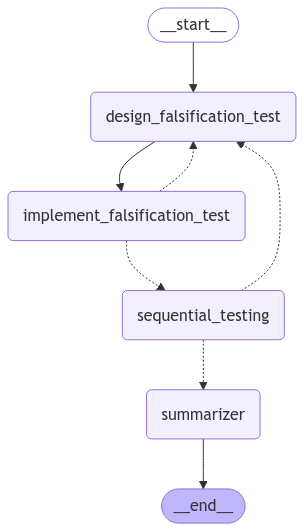

In [2]:
agent.configure(
    alpha=0.1,
    max_num_of_tests=5,
    max_retry=3,
    time_limit=2,
    aggregate_test='E-value',
    relevance_checker=True,
    use_react_agent=True
)

Let's test a biological hypothesis from the target validation benchmark:

In [3]:
from popper.benchmark import gene_perturb_hypothesis
bm = gene_perturb_hypothesis(num_of_samples = 1, permuted=False, dataset = 'IL2', path = path)
example = bm.get_example(0)
example

{'prompt': 'Gene VAV1 regulates the production of Interleukin-2 (IL-2).',
 'gene': 'VAV1',
 'answer': 2.916,
 'binary_answer': True}

Here you can simply validate a hypothesis via:

In [4]:
results = agent.validate(hypothesis=example['prompt'])

================================ Human Message =================================


Given a biology hypothesis "Gene VAV1 regulates the production of Interleukin-2 (IL-2).", your goal is to propose a novel falsification test given the available biology data sources. 
A falsification test is a test that can potentially falsify the main hypothesis. 
The outcome of the falsification test is to return a p-value that measures the evidence to falsify the main hypothesis.

Notably, the falsification test should satisfy the following property: if the main hypotheiss is null, then the falsification sub-hypothesis should also be null. 

Here are the list of available data sources, and you can directly call the dataframe as it has already been loaded; no need to load from file path. Each is a pandas dataframe with columns and example rows:

df_gtex_tissue_gene_tpm:
{'Description': 'ENSG00000186092', 'Tissue': 'Adipose - Subcutaneous', 'Expression': 0.0453961, 'Gene': 'OR4F5'}

df_gwas_catalog:
{'D

You can also see the discovery bench hypothesis via:

In [10]:
from popper.benchmark import discovery_bench_hypothesis
bm = discovery_bench_hypothesis(num_samples = 50, path = path)
example = bm.get_example(42)
example

----------Loading Discovery Bench------------
Loaded 50 hypotheses
--------------------------------------


{'task': 'archaeology',
 'domain': 'humanities',
 'metadataid': 5,
 'query_id': 0,
 'prompt': 'From 1700 BCE onwards, the use of hatchets and swords increased while the use of daggers decreased.',
 'data_loader': <popper.utils.DiscoveryBenchDataLoader at 0x7c208498a520>,
 'answer': True}

You can use your own data for validation. You can simply dump in a set of datasets in your domain (e.g. business, economics, political science, etc.) and run Popper on your own hypothesis. We only expect every file in that directory is in a csv or pkl format.

In [2]:
agent.register_data(data_path='/dfs/user/kexinh/popper_data_processed/bio_database', loader_type='custom')

Lastly, you can kick off a UI interface with this:

In [ ]:
agent.launch_UI(share = True)

In [3]:
agent.

In [9]:
import gradio

In [ ]:
from popper import Popper
path = '/dfs/user/kexinh/POPPER/data'
agent = Popper(llm="claude-3-5-sonnet-20240620")
agent.register_data(data_path=path, loader_type='bio')

Downloading:  23%|██▎       | 524M/2.27G [23:26<2:11:27, 222kB/s] 